In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [80]:
LEGO_all= pd.read_csv("LEGO.csv")
LEGO = LEGO_all[LEGO_all["date"] == LEGO_all["date"].max()]

TH         = pd.read_csv("TH-Aschaffenburg.csv")
TH_Faecher = pd.read_csv("TH-Aschaffenburg_Faecher.csv")

tips       = pd.read_csv("tips.csv")

## LEGO

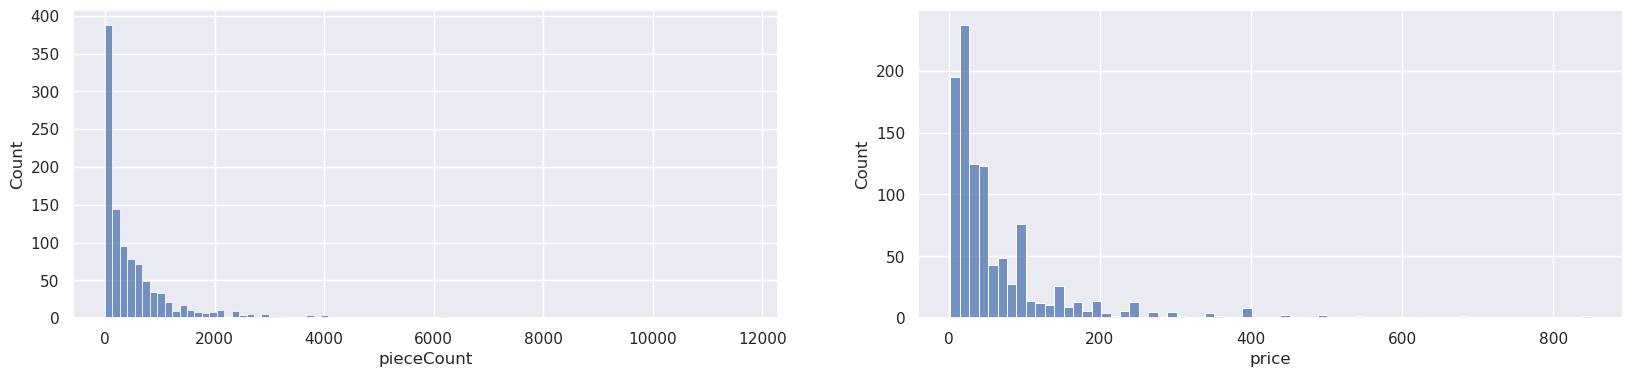

In [61]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
sns.histplot(data=LEGO, x="pieceCount", ax=axs[0])
sns.histplot(data=LEGO, x="price", ax=axs[1])
plt.show()

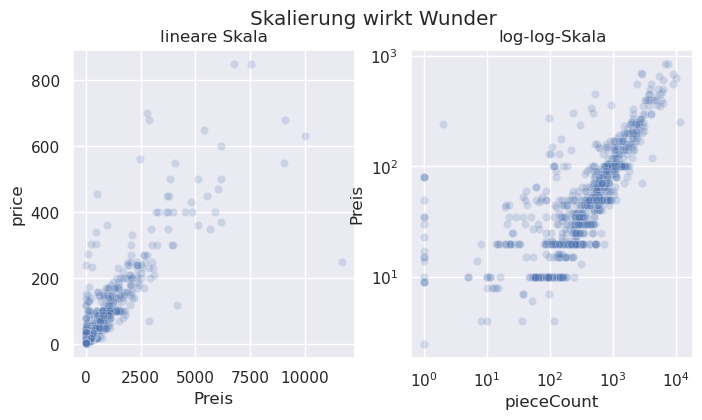

In [62]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(ax = axs[0],data = LEGO, x = "pieceCount", y = "price", alpha  = 0.2)
sns.scatterplot(ax = axs[1],data = LEGO, x = "pieceCount", y = "price", alpha  = 0.2)
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[0].set_xlabel("Anzahl Teile")
axs[1].set_ylabel("Anzahl Teile")
axs[0].set_xlabel("Preis")
axs[1].set_ylabel("Preis")
fig.suptitle("Skalierung wirkt Wunder")
axs[0].set_title("lineare Skala")
axs[1].set_title("log-log-Skala")
plt.show()
import warnings 
sns.scatterplot(ax = axs[0],data = LEGO, x = "pieceCount", y = "price", alpha  = 0.2)

warnings.filterwarnings("ignore")


## TH Aschaffenburg

In [63]:
TH.head()


,Jahr,Fach,Anfänger,Studierende
0,WS 02/03,BW,112.0,430.0
1,WS 02/03,BWR,57.0,230.0
2,WS 02/03,EIT,50.0,178.0
3,WS 02/03,M,44.0,44.0
4,WS 02/03,WI,69.0,183.0


In [65]:
#alternative zu Lambda
def my_function(x):
    return "20"+x[3:5] 
#TH["Jahr"].apply(lambda x:  int("20"+x[3:5]))

TH["year"]= TH["Jahr"].str.slice(3,5).astype(int)+2000
TH_full = pd.merge(left=TH, right = TH_Faecher, left_on = "Fach", right_on="Abkürzung")

TH_full.head()

,Jahr,Fach,Anfänger,Studierende,year,Abkürzung,Langname,Fakultät
0,WS 02/03,BW,112.0,430.0,2002,BW,Betriebswirtschaft,WR
1,WS 03/04,BW,116.0,460.0,2003,BW,Betriebswirtschaft,WR
2,WS 04/05,BW,126.0,488.0,2004,BW,Betriebswirtschaft,WR
3,WS 05/06,BW,118.0,489.0,2005,BW,Betriebswirtschaft,WR
4,WS 06/07,BW,128.0,515.0,2006,BW,Betriebswirtschaft,WR


In [79]:
TH_IW = TH_full[TH_full["Fakultät"]== "IW"]
TH_IW.sort_values(["year", "Studierende"], ascending = [False, False])
TH_IW.head(5)

,Jahr,Fach,Anfänger,Studierende,year,Abkürzung,Langname,Fakultät
42,WS 02/03,EIT,50.0,178.0,2002,EIT,Elektro- und Informationstechnik,IW
43,WS 03/04,EIT,57.0,198.0,2003,EIT,Elektro- und Informationstechnik,IW
44,WS 04/05,EIT,54.0,198.0,2004,EIT,Elektro- und Informationstechnik,IW
45,WS 05/06,EIT,64.0,209.0,2005,EIT,Elektro- und Informationstechnik,IW
46,WS 06/07,EIT,58.0,203.0,2006,EIT,Elektro- und Informationstechnik,IW


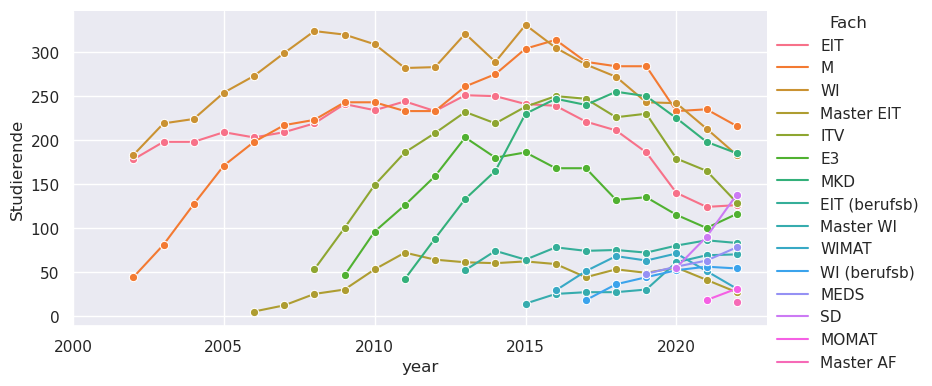

In [77]:
g=sns.relplot(data= TH_IW,kind = "line", x ="year", y = "Studierende", hue ="Fach", marker = "o", aspect = 2, height = 4)
g.set(xticks = range(2000, 2022, 5))#[2005,2010,2015,2020]
plt.show()

## Trinkgelder

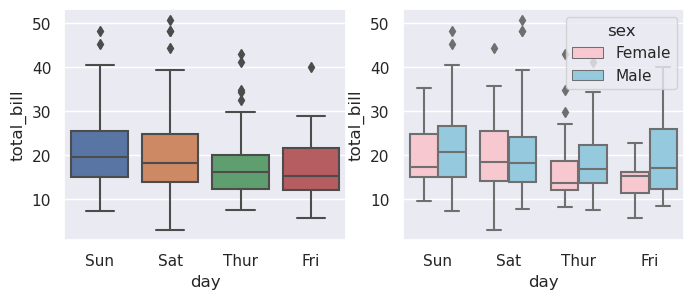

In [85]:
pd.Categorical(tips["day"], ordered = True, categories=["Thur", "Fri", "Sat", "Sun"])

fig, axs =plt.subplots(1,2, figsize=(8,3))
sns.boxplot(data=tips, x = "day", y = "total_bill", ax = axs[0])
sns.boxplot(data=tips, x = "day", y = "total_bill", ax = axs[1], hue ="sex", palette = dict(Female ="pink", Male = "skyblue"))
fig.savefig("bild.png")
plt.show()
